In [68]:
import pandas as pd
import os
import numpy as np

In [115]:
os.chdir('/Users/hongbozhu/Desktop/5291 ADA/ADA project')
data=pd.read_csv('listings.csv')
# a.head()
# My variable includes: 
    # 1. extra_charge/ price ratio
    # 2. deposits/ price ratio
    # 3. smoke or nat.
    
# Original data is something like $100.00. convert it to something like 100.00
data['price']=data['price'].replace('[\$,]','',regex=True).astype(float)
data['extra_people']=data['extra_people'].replace('[\$,]','',regex=True).astype(float)
data['security_deposit']=data['security_deposit'].replace('[\$,]','',regex=True).astype(float)

#compute the ratios which are first two variables.
deposits_price_ratio=data['security_deposit']/data['price']
extra_charge_price_ratio=data['extra_people']/data['price']

# the column 'house_rules' is with contex. host forbid somkes by words like " do not smoke",
# "no_smoke", 'please don't smoke', 'smoke outside'. As long as "smoke" appears, smoke is not allowed.
no_smoke=pd.to_numeric(data['house_rules'].str.contains('smoke'))

# combine all columns
new_data=pd.DataFrame({'id':data['id'],
                       'deposit_price_ratio':deposits_price_ratio,
                       'extra_charge_price_ratio':extra_charge_price_ratio,
                      'no_smoke':no_smoke})

# some rows of price are zero. so the ratio will be infinite. convert them to missing value.
new_data[new_data==np.inf]=np.nan
new_data.head()

/Users/hongbozhu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (43,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,deposit_price_ratio,extra_charge_price_ratio,id,no_smoke
0,0.000000,0.661017,2515,0.0
1,0.671141,0.167785,2539,0.0
2,1.555556,0.000000,2595,0.0
3,2.142857,0.714286,3330,0.0
4,1.333333,0.133333,3647,0.0


Simple EDA

In [105]:
# check missing values
new_data.isnull().apply(np.sum) # there are a lot of missing value

deposit_price_ratio         20063
extra_charge_price_ratio       28
id                              0
no_smoke                    20585
dtype: int64

In [106]:
new_data.join(data['review_scores_rating'],on='id').corr()

,deposit_price_ratio,extra_charge_price_ratio,id,review_scores_rating
deposit_price_ratio,1.000000,0.066427,-0.096822,0.032316
extra_charge_price_ratio,0.066427,1.000000,-0.004291,0.014509
id,-0.096822,-0.004291,1.000000,-0.004388
review_scores_rating,0.032316,0.014509,-0.004388,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x23ebc0080>,
      dtype=object)

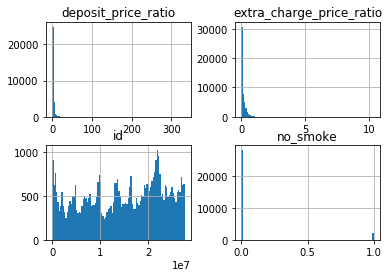

In [116]:
import matplotlib.pyplot as plt
% matplotlib inline
new_data.hist(bins=100)